In [3]:
import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Create a connection to the Database
conn = sqlite3.connect('database.sqlite')


# Data Understanding

In [5]:
tables = pd.read_sql("""SELECT name
                          FROM sqlite_master
                         WHERE type= 'table';""",conn)
tables

,name
0,sqlite_sequence
1,Player_Attributes
2,Player
3,Match
4,League
5,Country
6,Team
7,Team_Attributes


For now, my focus would be on investigating the leagues and clubs in each league.
> The Country, League, Team and Match tables looks more useful for this purpose and would be investigated 

### Leagues in Each Country

In [6]:
countries = pd.read_sql_query("""SELECT *
                                   FROM Country;""",conn)
countries                            

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- There are 10 leagues from 10 different countries in the dataset. All of which are the top division in each country

- The Big Five represent the five most successful football leagues in Europe, which are made up of the Premier League in England, La Liga in Spain, the Bundesliga in Germany, Serie A in Italy, and Ligue 1 in France.

In [7]:
big_five = ['England','Spain','Germany','Italy','France']

In [8]:
leagues = pd.read_sql("""SELECT l.country_id, c.name country, l.name league
                           FROM Country c
                           JOIN League l
                             ON c.id = l.country_id;""", conn)
leagues                      

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


### List of Teams

In [9]:
teams = pd.read_sql_query("""SELECT *
                               FROM Team
                              ORDER BY team_long_name;""",conn)

teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
...,...,...,...,...,...
294,43800,9868,1742.0,Xerez Club Deportivo,XER
295,31928,8021,110749.0,Zagłębie Lubin,ZAG
296,33855,8027,112512.0,Zawisza Bydgoszcz,ZAW
297,11822,4087,111271.0,Évian Thonon Gaillard FC,ETG


### List of Matches

In [10]:
match = pd.read_sql_query("""SELECT *
                               FROM Match;""",conn)

match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Checking which column doesnt contain null values
non_null = match.isnull().any()
non_null[non_null == False].index

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal'],
      dtype='object')

- Further investigation of the Match columns reveals that the columns without null value would be okay for my investigation
> So i"ll go ahead and drop all columns with null value

In [12]:
matches = match.dropna(axis=1)
print(matches.shape)
matches.head(3)

(25979, 11)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3


In [21]:
# How many soccer seasons are in the dataset?
len(matches['season'].unique())

8

In [22]:
leagues

,country_id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A
5,13274,Netherlands,Netherlands Eredivisie
6,15722,Poland,Poland Ekstraklasa
7,17642,Portugal,Portugal Liga ZON Sagres
8,19694,Scotland,Scotland Premier League
9,21518,Spain,Spain LIGA BBVA


In [14]:
matches.dtypes

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [15]:
leagues.dtypes

country_id     int64
country       object
league        object
dtype: object

- Now lets start asking questions

# What is the proportion of Match results?
- Over the 8 seasons, what % ends in draw, Home, and away win

In [25]:
# Join the league and matches table
league_matches = leagues.merge(matches, on='country_id')
league_matches.head()

,country_id,country,league,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,Belgium Jupiler League,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,Belgium Jupiler League,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,Belgium Jupiler League,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [ ]:
league_matches.drop(columns=['id','league_id'],inplace = True)

In [29]:
league_matches.head(2)

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0


In [33]:
league_matches.duplicated().sum()

0

In [42]:
league_matches

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...
25974,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,24558,Switzerland,Switzerland Super League,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0


### Helper Function
> Function to help in our analysis

In [43]:
def match_result(home_goals, away_goals):
    """This function determines the final result based on the number of goals scored by the home and away team
        It returns the result"""
    if (home_goals > away_goals):
        return 'Home'
    elif (home_goals < away_goals):
        return 'Away'
    else:
        return 'Tie'

### Get the Result of all the league matches played

In [44]:
league_matches['result'] = league_matches.apply(lambda game: match_result(game['home_team_goal'],game['away_team_goal']), axis=1)
league_matches.head()

,country_id,country,league,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,result
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,Tie
1,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,Tie
2,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,Away
3,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,Home
4,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,Away


In [45]:
league_matches.isna().any()

country_id          False
country             False
league              False
season              False
stage               False
date                False
match_api_id        False
home_team_api_id    False
away_team_api_id    False
home_team_goal      False
away_team_goal      False
result              False
dtype: bool

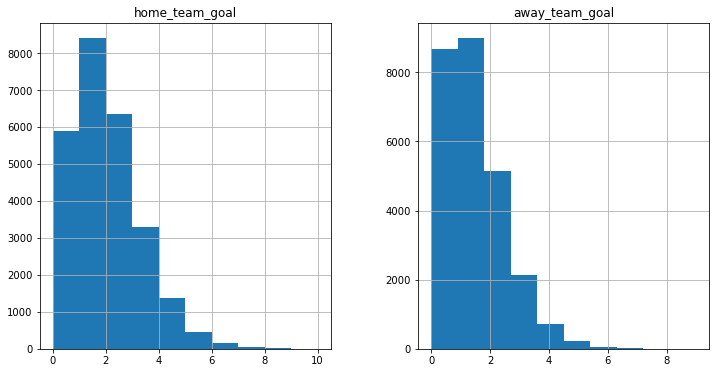

In [47]:
league_matches[['home_team_goal','away_team_goal']].hist(figsize=(12,6));

In [56]:
league_result = league_matches['result'].value_counts().to_frame()
league_result

,result
Home,11917
Away,7466
Tie,6596


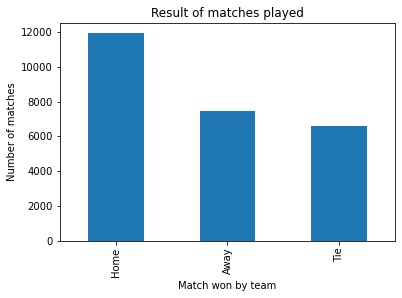

In [68]:
league_result.result.plot(kind='bar')
plt.title('Result of matches played')
plt.xlabel('Match won by team')
plt.ylabel('Number of matches');

> The home team winning clearly happens alot more than other results, but by what percent?

### Getting Result Proportion(%)

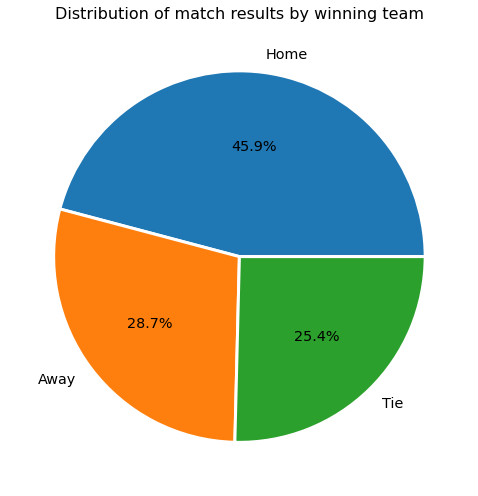

In [105]:
plt.figure(figsize=(7,7))
pie_labels = list(league_result.index)
plt.pie(list(league_result['result']), labels = pie_labels, autopct='%1.1f%%',
             wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
             textprops={'size': 'x-large'});
plt.title('Distribution of match results by winning team',fontsize=16);
plt.tight_layout()